#### compare performance of existing methods

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score

In [2]:
def classify(label):
    if(np.abs(label) >= 0.4):
        label = 1
    else:
        label = 0
    return label

In [3]:
annotation_file = '../../datasets/annotation/comparison_table.csv'
annotation = pd.read_csv(annotation_file)
annotation.head()

,DDG,PDB,MUTATION,CHAIN,imutant-PRED,mcsmmem-PRED,SDM-PRED,DUET-PRED
0,-1.3,1AFO.pdb,L75A,A,-2.55,-0.530,0.04,-1.609
1,-1.8,1AFO.pdb,I76A,A,-2.26,-1.898,-3.22,-3.024
2,-1.7,1AFO.pdb,G79A,A,-0.80,-1.228,1.80,-0.392
3,-0.4,1AFO.pdb,V80A,A,-1.26,-1.538,0.61,-1.222
4,-1.3,2K73.pdb,A62G,A,-0.83,-0.141,-1.40,-1.132


##### model 1: mcsm-membrane

In [4]:
label_list = []
pred_list = []
for i in np.array(annotation['DDG'].values):
    label_list.append(classify(i))
for i in np.array(annotation['mcsmmem-PRED'].values):
    pred_list.append(classify(i))
label = np.array(label_list)
pred = np.array(pred_list)
print(label)
print(pred)

[1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1]
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1]


In [5]:
print('acc=', accuracy_score(label,pred))
print('precision=', precision_score(label,pred))
print('recall=',recall_score(label,pred))
print('f1-score=',f1_score(label,pred))

acc= 0.6944444444444444
precision= 0.8
recall= 0.8275862068965517
f1-score= 0.8135593220338982


##### model 2: i-mutant

In [6]:
label_list = []
pred_list = []
for i in np.array(annotation['DDG'].values):
    label_list.append(classify(i))
for i in np.array(annotation['imutant-PRED'].values):
    pred_list.append(classify(i))
label = np.array(label_list)
pred = np.array(pred_list)
print(label)
print(pred)

[1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


##### model 3: SDM

In [7]:
label_list = []
pred_list = []
for i in np.array(annotation['DDG'].values):
    label_list.append(classify(i))
for i in np.array(annotation['SDM-PRED'].values):
    pred_list.append(classify(i))
label = np.array(label_list)
pred = np.array(pred_list)
print(label)
print(pred)

[1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1]
[0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]


In [8]:
print('acc=', accuracy_score(label,pred))
print('precision=', precision_score(label,pred))
print('recall=',recall_score(label,pred))
print('f1-score=',f1_score(label,pred))

acc= 0.6111111111111112
precision= 0.7777777777777778
recall= 0.7241379310344828
f1-score= 0.75


#### model 4: DUET

In [9]:
label_list = []
pred_list = []
for i in np.array(annotation['DDG'].values):
    label_list.append(classify(i))
for i in np.array(annotation['DUET-PRED'].values):
    pred_list.append(classify(i))
label = np.array(label_list)
pred = np.array(pred_list)
print(label)
print(pred)

[1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1]
[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1]


In [10]:
print('acc=', accuracy_score(label,pred))
print('precision=', precision_score(label,pred))
print('recall=',recall_score(label,pred))
print('f1-score=',f1_score(label,pred))

acc= 0.7222222222222222
precision= 0.8064516129032258
recall= 0.8620689655172413
f1-score= 0.8333333333333334


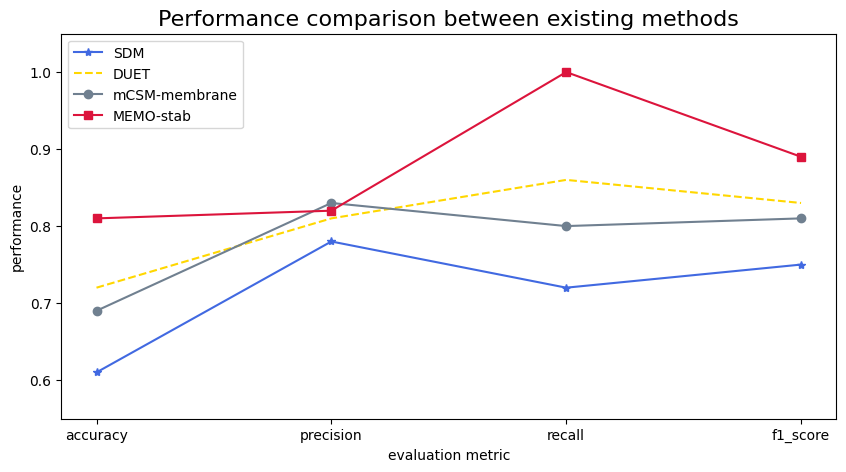

In [11]:
# plot
import matplotlib.pyplot as plt
x = np.arange(4) # acc,pre,recall,f1
y1 = [0.61,0.78,0.72,0.75]
y2 = [0.72,0.81,0.86,0.83]
y3 = [0.69,0.83,0.80,0.81]
y4 = [0.81,0.82,1.00,0.89]
fig = plt.figure(figsize=(10,5))
plt.plot(x,y1,'*-',color='#4169E1',label='SDM')
plt.plot(x,y2,'--',color='#FFD700',label='DUET')
plt.plot(x,y3,'o-',color='#708090',label='mCSM-membrane')
plt.plot(x,y4,'s-',color='#DC143C',label='MEMO-stab')
plt.xticks([0,1,2,3],['accuracy','precision','recall','f1_score'])
plt.legend(loc = "best")
plt.ylim((0.55, 1.05))
plt.xlabel("evaluation metric")
plt.ylabel("performance")
plt.title('Performance comparison between existing methods', fontsize=16)
plt.savefig('images/model_comparison.png',dpi=300, bbox_inches = 'tight')
plt.show()